# Programming Assignment 1

### by Joshua Rodriguez


## Create a Correlation Plot




In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.io import arff

In [4]:
data, meta = arff.loadarff('caesarian.csv.arff')
df = pd.DataFrame(data)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
print(df.head())
print(df.dtypes)


  Age Delivery number Delivery time Blood of Pressure Heart Problem Caesarian
0  22               1             0                 2             0         0
1  26               2             0                 1             0         1
2  26               2             1                 1             0         0
3  28               1             0                 2             0         0
4  22               2             0                 1             0         1
Age                  object
Delivery number      object
Delivery time        object
Blood of Pressure    object
Heart Problem        object
Caesarian            object
dtype: object


In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        except ValueError:
            continue
df = df.dropna()
print(df.dtypes)


Age                  int64
Delivery number      int64
Delivery time        int64
Blood of Pressure    int64
Heart Problem        int64
Caesarian            int64
dtype: object


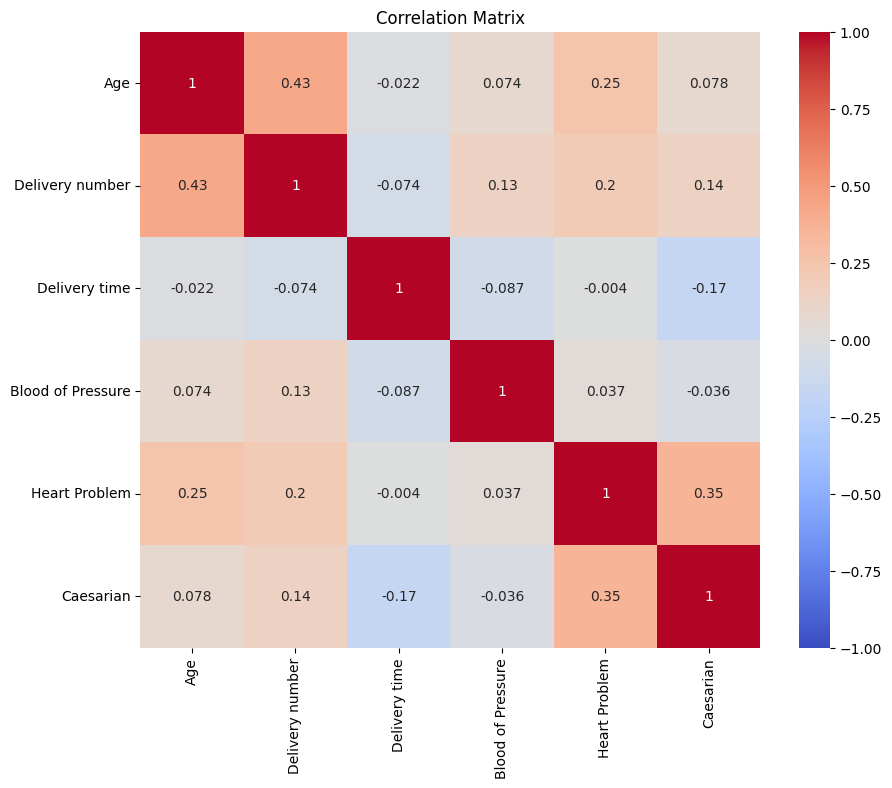

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


 ## Check the distribution of each column and determine which probability distiribution it fits.



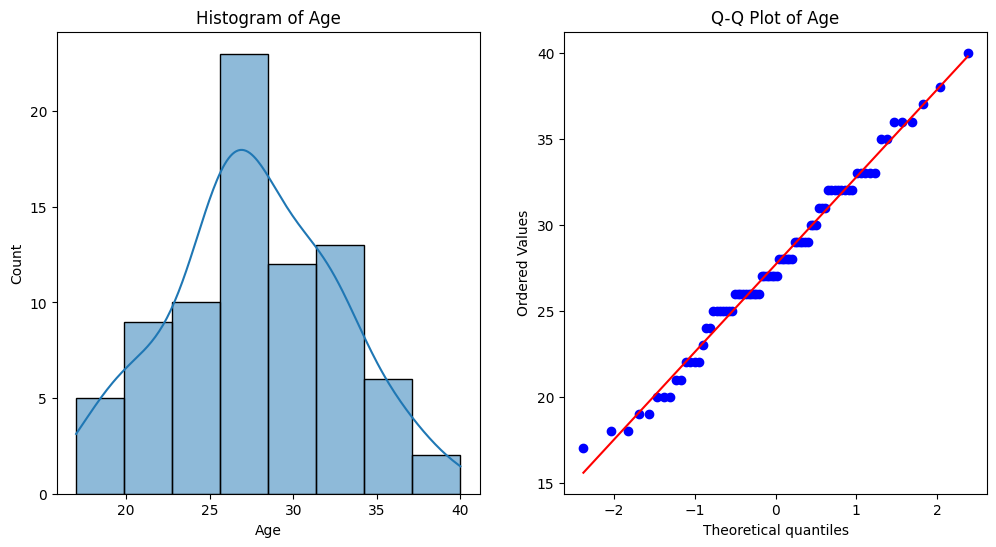

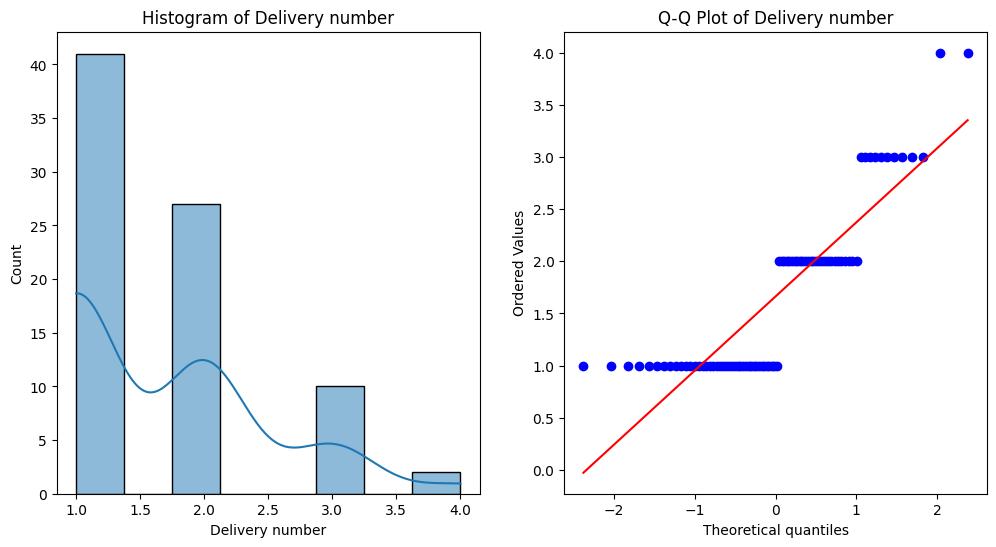

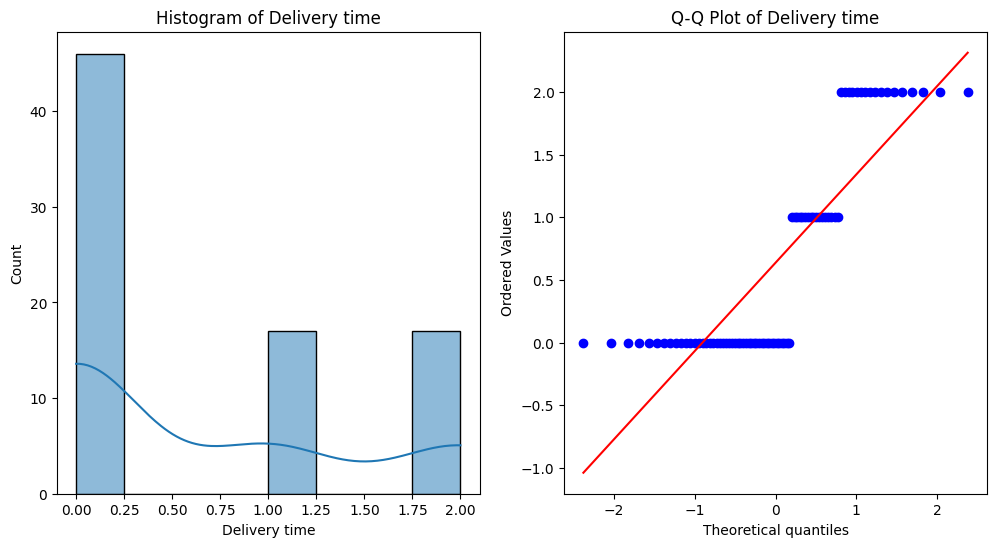

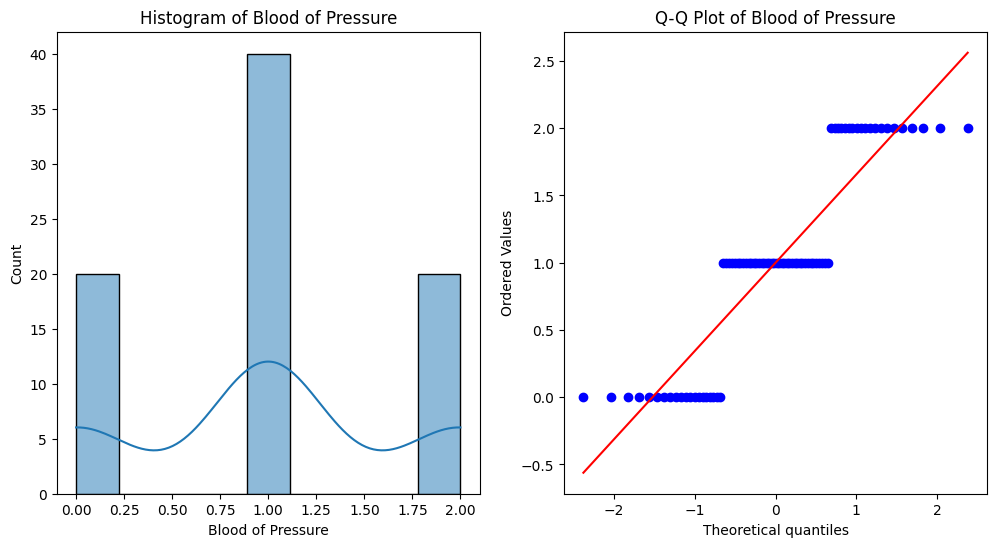

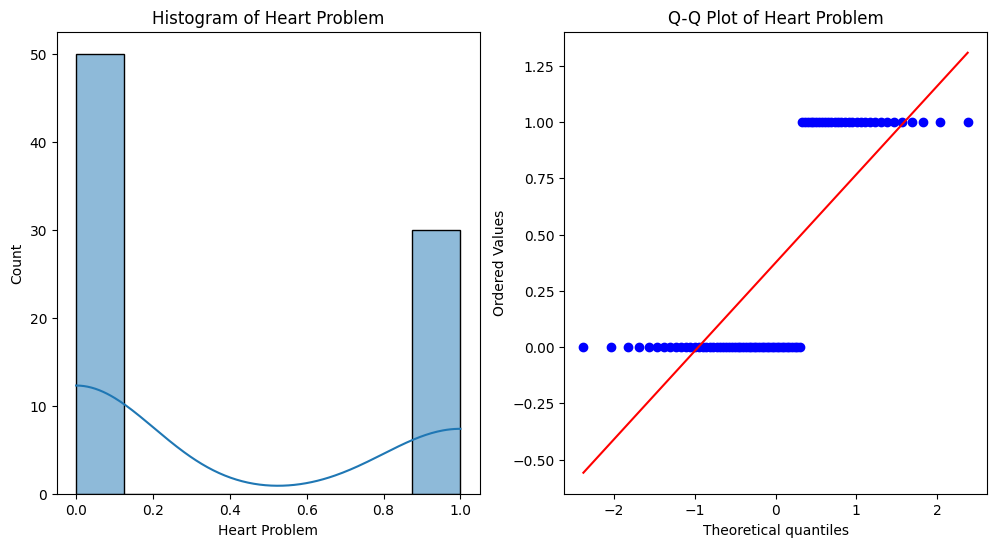

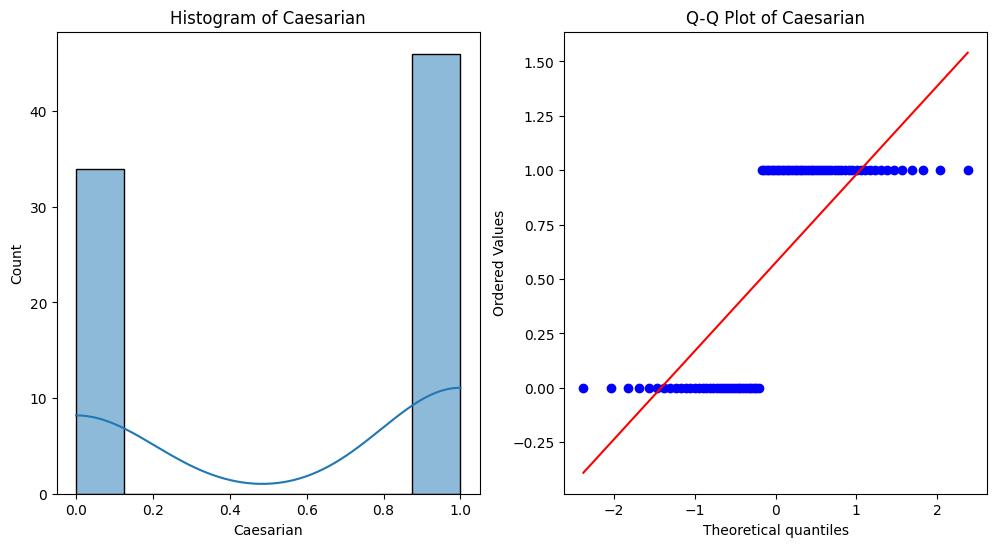

In [13]:
for column in numeric_df.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(numeric_df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

Create a summary statistics.



In [12]:
summary_stats = numeric_df.describe()
print(summary_stats)

             Age  Delivery number  Delivery time  Blood of Pressure  \
count  80.000000        80.000000      80.000000          80.000000   
mean   27.687500         1.662500       0.637500           1.000000   
std     5.017927         0.794662       0.815107           0.711568   
min    17.000000         1.000000       0.000000           0.000000   
25%    25.000000         1.000000       0.000000           0.750000   
50%    27.000000         1.000000       0.000000           1.000000   
75%    32.000000         2.000000       1.000000           1.250000   
max    40.000000         4.000000       2.000000           2.000000   

       Heart Problem  Caesarian  
count      80.000000  80.000000  
mean        0.375000   0.575000  
std         0.487177   0.497462  
min         0.000000   0.000000  
25%         0.000000   0.000000  
50%         0.000000   1.000000  
75%         1.000000   1.000000  
max         1.000000   1.000000  


## Perform a hypothesis test (Code from scratch)

In [11]:
mu = 30
if 'Age' in numeric_df.columns:
    sample = numeric_df['Age']
    t_statistic, p_value = stats.ttest_1samp(sample, mu)
    print(f'T-statistic: {t_statistic}')
    print(f'P-value: {p_value}')

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The mean is significantly different from 30.")
    else:
        print("Fail to reject the null hypothesis: The mean is not significantly different from 30.")
else:
    print("'Age' column not found in the dataset.")


T-statistic: -4.121947156557701
P-value: 9.202016646069011e-05
Reject the null hypothesis: The mean is significantly different from 30.
